# IMPORTING LIBRARIES

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# IMPORTING DATA

In [6]:
df=pd.read_excel('Superstore.xlsx')

In [7]:
df.head()


,Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,...,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,3,$392,Shipped On Time,3,$261.96,0.160,Furniture,Henderson,United States,Claire Gute,...,$42,2,South,$41.91,$262,Consumer,2016-11-11,Second Class,Kentucky,Bookcases
1,3,"$1,096",Shipped On Time,3,$731.94,0.300,Furniture,Henderson,United States,Claire Gute,...,$220,3,South,$219.58,$732,Consumer,2016-11-11,Second Class,Kentucky,Chairs
2,4,$22,Shipped Late,3,$14.62,0.470,Office Supplies,Los Angeles,United States,Darrin Van Huff,...,$7,2,West,$6.87,$15,Corporate,2016-06-16,Second Class,California,Labels
3,7,"$1,434",Shipped Late,6,$957.58,-0.400,Furniture,Fort Lauderdale,United States,Sean O'Donnell,...,($383),5,South,$-383.03,$958,Consumer,2015-10-18,Standard Class,Florida,Tables
4,7,$33,Shipped Late,6,$22.37,0.113,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,...,$3,2,South,$2.52,$22,Consumer,2015-10-18,Standard Class,Florida,Storage


# YEARWISE SALES GROWTH COMPARISION BAR CHART FOR 4 YRS

Order Date
2014    484247.51
2015    470532.42
2016    609205.74
2017    733215.11
Name: Sales per Customer, dtype: float64


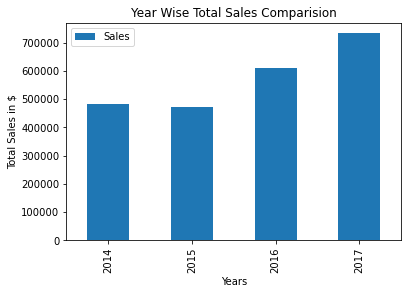

In [8]:
'''
YEARWISE SALES GROWTH COMPARISION BAR CHART FOR 4 YRS
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''


file='Superstore.xlsx'
df=pd.read_excel(file,usecols=['Order Date','Sales per Customer'])
#print(df['Sales per Customer'].str.strip('$').str.replace#(',','').astype(float))
df['Sales per Customer']=df['Sales per Customer'].str.strip('$').str.replace(',','').astype(float)

pdata=df.groupby(df['Order Date'].dt.year)['Sales per Customer'].agg(np.sum)
print(pdata)
pdata.plot.bar(label='Sales')
plt.title('Year Wise Total Sales Comparision')
plt.xlabel('Years')
plt.ylabel('Total Sales in $')
plt.legend()
plt.show()

# YEARWISE SALES GROWTH COMPARISION ALONGWITH %WISE GROWTH CHART

Order Date
2014    484247.51
2015    470532.42
2016    609205.74
2017    733215.11
Name: Sales per Customer, dtype: float64


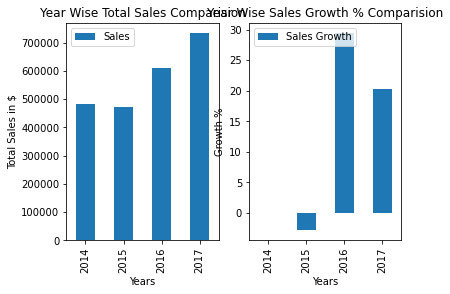

In [9]:
'''
YEARWISE SALES GROWTH COMPARISION ALONGWITH %WISE GROWTH CHART

this solution is by using converters ,while reading excel
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''

file='Superstore.xlsx'

#convert sales values into float,after removing "$ ,"
df=pd.read_excel(file,usecols=['Order Date','Sales per Customer'],converters={'Sales per Customer':lambda x:float(x.strip('$').replace(',',''))})

#grouping by year and sum of sales(yearwise)
pdata=df.groupby(df['Order Date'].dt.year)['Sales per Customer'].agg(np.sum)
print(pdata)

#computing pct_change of sales 
yoy_gr=pdata.pct_change()*100


#ploting YOY total sales data
plt.subplot(1,2,1)
pdata.plot.bar(label='Sales')
plt.title('Year Wise Total Sales Comparision')
plt.xlabel('Years')
plt.ylabel('Total Sales in $')
plt.legend()

#ploting pct_change data
plt.subplot(1,2,2)
yoy_gr.plot.bar(label='Sales Growth')
plt.title('Year Wise Sales Growth % Comparision')
plt.xlabel('Years')
plt.ylabel('Growth %')
plt.legend(loc='upper left')
plt.show()


# YEARWISE PROFIT COMARISION BAR CHART FOR 4 YRS 

     Order Date  Profit
0    2016-11-08    42.0
1    2016-11-08   220.0
2    2016-06-12     7.0
3    2015-10-11   383.0
4    2015-10-11     3.0
...         ...     ...
9989 2014-01-21     4.0
9990 2017-02-26    16.0
9991 2017-02-26    19.0
9992 2017-02-26    13.0
9993 2017-05-04    73.0

[9994 rows x 2 columns]
Order Date
2014    113326.0
2015    126658.0
2016    157528.0
2017    201111.0
Name: Profit, dtype: float64


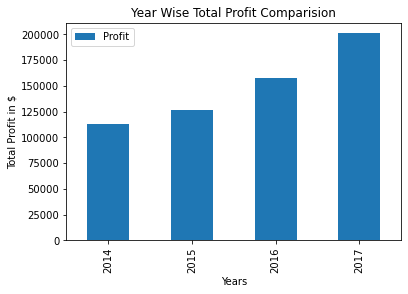

In [10]:
'''
YEARWISE PROFIT COMARISION BAR CHART FOR 4 YRS 
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''

file='Superstore.xlsx'
df=pd.read_excel(file,usecols=['Order Date','Profit'])
#print(df)

#using regex to remove "$()," etc.
df['Profit']=df['Profit'].replace('[$,()]','',regex=True).astype(float)
print(df)


pdata=df.groupby(df['Order Date'].dt.year)['Profit'].agg(np.sum)
print(pdata)
pdata.plot.bar(label='Profit')
plt.title('Year Wise Total Profit Comparision')
plt.xlabel('Years')
plt.ylabel('Total Profit in $')
plt.legend()
plt.savefig('YWPC')
plt.show()


# YEARWISE PROFIT COMPARISION ALONGWITH PCT_CHANGE

Order Date
2014    113326.0
2015    126658.0
2016    157528.0
2017    201111.0
Name: Profit, dtype: float64
Order Date
2014     0.000000
2015    11.764291
2016    24.372720
2017    27.666827
Name: Profit, dtype: float64


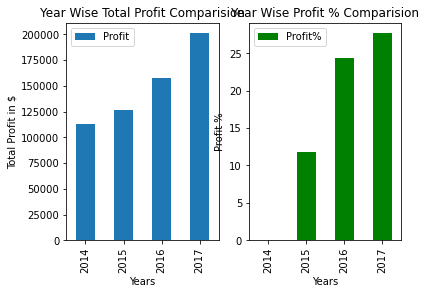

In [11]:
'''
YEARWISE PROFIT COMPARISION ALONGWITH PCT_CHANGE
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

file='Superstore.xlsx'
df=pd.read_excel(file,usecols=['Order Date','Profit'])

#using regex to remove "$()," etc.
df['Profit']=df['Profit'].replace('[$,()]','',regex=True).astype(float)

pdata=df.groupby(df['Order Date'].dt.year)['Profit'].agg(np.sum)
print(pdata)

yoy_grow=pdata.pct_change()*100
yoy_grow=yoy_grow.fillna(0)
print(yoy_grow)

plt.subplot(1,2,1)
pdata.plot.bar(label='Profit')
plt.title('Year Wise Total Profit Comparision')
plt.xlabel('Years')
plt.ylabel('Total Profit in $')
plt.legend()

plt.subplot(1,2,2)
yoy_grow.plot.bar(label='Profit%',color='g')
plt.title('Year Wise Profit % Comparision')
plt.xlabel('Years')
plt.ylabel('Profit %')
#plt.xticks([2014,2015,2016,2017])
plt.legend()
#plt.savefig('YWPCAW%.png')
plt.show()


# YEARWISE MONTHWISE SALES COMARISION BAR CHART FOR 4 YRS

Order Date  Order Date
2014        1              14236.90
            2               4519.92
            3              55691.04
            4              28295.35
            5              23648.26
            6              34595.13
            7              33946.37
            8              27909.46
            9              81777.34
            10             31453.37
            11             78628.73
            12             69545.64
2015        1              18174.08
            2              11951.40
            3              38726.26
            4              34195.24
            5              30131.72
            6              24797.31
            7              28765.32
            8              36898.31
            9              64595.87
            10             31404.90
            11             75972.50
            12             74919.51
2016        1              18542.52
            2              22978.82
            3              51715.85
     

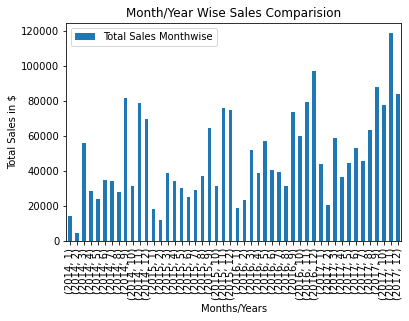

In [12]:
'''
YEARWISE MONTHWISE SALES COMARISION BAR CHART FOR 4 YRS 
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

file='Superstore.xlsx'
df=pd.read_excel(file,usecols=['Order Date','Sales per Customer'])

#using regex to remove "$()," etc.
df['Sales per Customer']=df['Sales per Customer'].replace('[$,()]','',regex=True).astype(float)

pdata=df.groupby([df['Order Date'].dt.year,df['Order Date'].dt.month])['Sales per Customer'].agg(np.sum)
print(pdata)
pdata.plot.bar(label='Total Sales Monthwise')
plt.title('Month/Year Wise Sales Comparision')
plt.xlabel('Months/Years')
plt.ylabel('Total Sales in $')
plt.legend()
plt.show()

# YEARWISE MONTHWISE SALES COMARISION LINE CHART FOR 4 YRS 

Order Date  Order Date
2014        1              14236.90
            2               4519.92
            3              55691.04
            4              28295.35
            5              23648.26
            6              34595.13
            7              33946.37
            8              27909.46
            9              81777.34
            10             31453.37
            11             78628.73
            12             69545.64
2015        1              18174.08
            2              11951.40
            3              38726.26
            4              34195.24
            5              30131.72
            6              24797.31
            7              28765.32
            8              36898.31
            9              64595.87
            10             31404.90
            11             75972.50
            12             74919.51
2016        1              18542.52
            2              22978.82
            3              51715.85
     

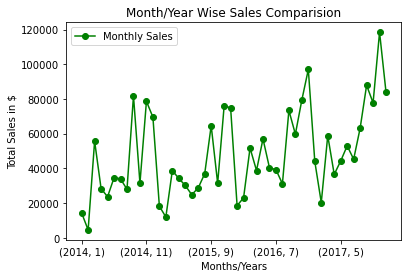

In [13]:
'''
YEARWISE MONTHWISE SALES COMARISION LINE CHART FOR 4 YRS 
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

file='Superstore.xlsx'
df=pd.read_excel(file,usecols=['Order Date','Sales per Customer'])

#using regex to remove "$()," etc.
df['Sales per Customer']=df['Sales per Customer'].replace('[$,()]','',regex=True).astype(float)

pdata=df.groupby([df['Order Date'].dt.year,df['Order Date'].dt.month])['Sales per Customer'].agg(np.sum)

print(pdata)

pdata.plot(label='Monthly Sales',style='g-o')
plt.title('Month/Year Wise Sales Comparision')
plt.xlabel('Months/Years')
plt.ylabel('Total Sales in $')
plt.legend()
plt.show()

           

# YEARWISE MONTHWISE PROFIT COMARISION BAR CHART FOR 4 YRS 

Order Date  Order Date
2014        1              3760.0
            2              1063.0
            3              9375.0
            4              5336.0
            5              6250.0
            6              7569.0
            7              8370.0
            8              7575.0
            9             22582.0
            10             6552.0
            11            19096.0
            12            15798.0
2015        1              5683.0
            2              3502.0
            3             11770.0
            4             10755.0
            5              6504.0
            6              6952.0
            7              6774.0
            8              8863.0
            9             15947.0
            10             7145.0
            11            20259.0
            12            22504.0
2016        1              4718.0
            2              5888.0
            3             11186.0
            4             10799.0
            5            

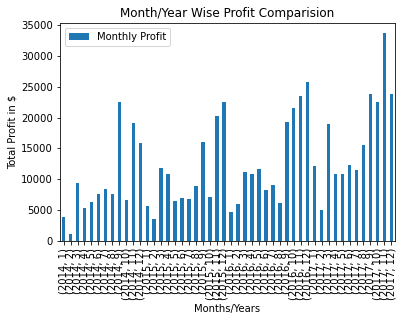

In [14]:
'''
YEARWISE MONTHWISE PROFIT COMARISION BAR CHART FOR 4 YRS 
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

file='Superstore.xlsx'
df=pd.read_excel(file,usecols=['Order Date','Profit'])
#print(df)

#using regex to remove "$()," etc.
df['Profit']=df['Profit'].replace('[$,()]','',regex=True).astype(float)

pdata=df.groupby([df['Order Date'].dt.year,df['Order Date'].dt.month])['Profit'].agg(np.sum)
print(pdata)
pdata.plot.bar(label='Monthly Profit')
plt.title('Month/Year Wise Profit Comparision')
plt.xlabel('Months/Years')
plt.ylabel('Total Profit in $')
plt.legend()
plt.show()


# YEARWISE QUARTERWISE SALES COMPARISION BAR CHART FOR 4 YRS 

Order Date  Order Date
2014        1              74447.86
            2              86538.74
            3             143633.17
            4             179627.74
2015        1              68851.74
            2              89124.27
            3             130259.50
            4             182296.91
2016        1              93237.19
            2             136082.28
            3             143787.40
            4             236098.87
2017        1             123144.84
            2             133764.30
            3             196251.93
            4             280054.04
Name: Sales per Customer, dtype: float64


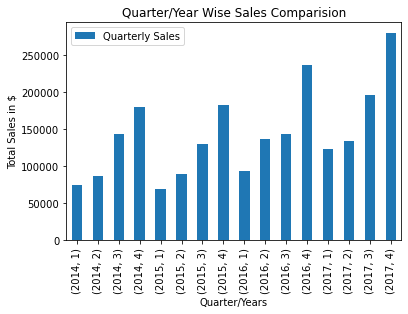

In [15]:
'''
YEARWISE QUARTERWISE SALES COMPARISION BAR CHART FOR 4 YRS 
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

file='Superstore.xlsx'
df=pd.read_excel(file,usecols=['Order Date','Sales per Customer'])
#print(df)

#using regex to remove "$()," etc.
df['Sales per Customer']=df['Sales per Customer'].replace('[$,()]','',regex=True).astype(float)


#to get series
pdata=df.groupby([df['Order Date'].dt.year,df['Order Date'].dt.quarter])['Sales per Customer'].agg(np.sum)
'''
#to get dataframe put in double [['Sales per Customer' ]]
pdata=df.groupby([df['Order Date'].dt.year,df['Order Date'].dt.quarter])[['Sales per Customer']].agg(np.sum)
'''
print(pdata)

pdata.plot.bar(label='Quarterly Sales')
plt.title('Quarter/Year Wise Sales Comparision')
plt.xlabel('Quarter/Years')
plt.ylabel('Total Sales in $')
plt.legend()
plt.show()


# YEARWISE QUARTERWISE PROFIT COMARISION BAR CHART FOR 4 YRS 

                        Profit
Order Date Order Date         
2014       1           14198.0
           2           19155.0
           3           38527.0
           4           41446.0
2015       1           20955.0
           2           24211.0
           3           31584.0
           4           49908.0
2016       1           21792.0
           2           30602.0
           3           34280.0
           4           70854.0
2017       1           36043.0
           2           34000.0
           3           50952.0
           4           80116.0


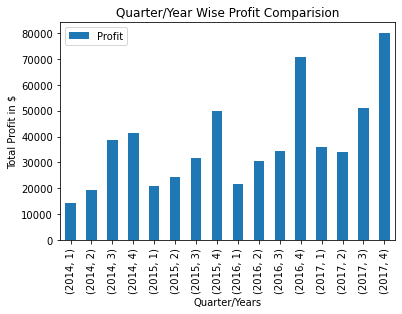

In [16]:
'''
YEARWISE QUARTERWISE PROFIT COMARISION BAR CHART FOR 4 YRS 
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

file='Superstore.xlsx'
df=pd.read_excel(file,usecols=['Order Date','Profit'])
#print(df)

#using regex to remove "$()," etc.
df['Profit']=df['Profit'].replace('[$,()]','',regex=True).astype(float)

pdata=df.groupby([df['Order Date'].dt.year,df['Order Date'].dt.quarter])[['Profit']].agg(np.sum)

print(pdata)


pdata.plot.bar(label='Quarterly Profit')
plt.title('Quarter/Year Wise Profit Comparision')
plt.xlabel('Quarter/Years')
plt.ylabel('Total Profit in $')
plt.legend()
plt.show()


# MONTHWISE (ignore years)SALES COMPARISION BAR CHART FOR 4 YRS 

Order Date
1      94924.87
2      59751.26
3     205005.50
4     137762.13
5     155028.81
6     152718.65
7     147238.09
8     159043.96
9     307649.95
10    200322.99
11    352461.05
12    325293.52
Name: Sales per Customer, dtype: float64


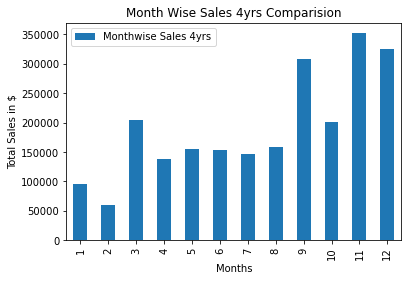

In [17]:
'''
MONTHWISE (ignore years)SALES COMPARISION BAR CHART FOR 4 YRS 
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

file='Superstore.xlsx'
df=pd.read_excel(file,usecols=['Order Date','Sales per Customer'])
#print(df)

#using regex to remove "$()," etc.
df['Sales per Customer']=df['Sales per Customer'].replace('[$,()]','',regex=True).astype(float)


#to get series
pdata=df.groupby([df['Order Date'].dt.month])['Sales per Customer'].agg(np.sum)
'''
#to get dataframe put in double [['Sales per Customer' ]]
pdata=df.groupby([df['Order Date'].dt.month])[['Sales per Customer']].agg(np.sum)
'''
print(pdata)

pdata.plot.bar(label='Monthwise Sales 4yrs')
plt.title('Month Wise Sales 4yrs Comparision')
plt.xlabel('Months')
plt.ylabel('Total Sales in $')
plt.legend()
plt.show()



# MONTHWISE(ignore yrs)PROFIT COMARISION BAR CHART FOR 4 YRS 

             Profit
Order Date         
1           26264.0
2           15431.0
3           51293.0
4           37724.0
5           35265.0
6           34979.0
7           35666.0
8           38072.0
9           81605.0
10          57814.0
11          96537.0
12          87973.0


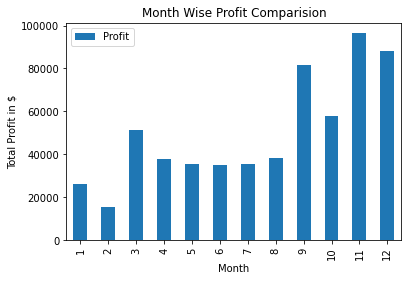

In [18]:
'''
MONTHWISE(ignore yrs)PROFIT COMARISION BAR CHART FOR 4 YRS 
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

file='Superstore.xlsx'
df=pd.read_excel(file,usecols=['Order Date','Profit'])
#print(df)

#using regex to remove "$()," etc.
df['Profit']=df['Profit'].replace('[$,()]','',regex=True).astype(float)

pdata=df.groupby([df['Order Date'].dt.month])[['Profit']].agg(np.sum)

print(pdata)


pdata.plot.bar(label='Monthly Profit for 4yrs')
plt.title('Month Wise Profit Comparision')
plt.xlabel('Month')
plt.ylabel('Total Profit in $')
plt.legend()
plt.show()



# MONTHWISE YEARWISE PROFIT COMARISION BAR CHART FOR 4 YRS 

                        Profit
Order Date Order Date         
1          2014         3760.0
           2015         5683.0
           2016         4718.0
           2017        12103.0
2          2014         1063.0
           2015         3502.0
           2016         5888.0
           2017         4978.0
3          2014         9375.0
           2015        11770.0
           2016        11186.0
           2017        18962.0
4          2014         5336.0
           2015        10755.0
           2016        10799.0
           2017        10834.0
5          2014         6250.0
           2015         6504.0
           2016        11645.0
           2017        10866.0
6          2014         7569.0
           2015         6952.0
           2016         8158.0
           2017        12300.0
7          2014         8370.0
           2015         6774.0
           2016         8991.0
           2017        11531.0
8          2014         7575.0
           2015         8863.0
        

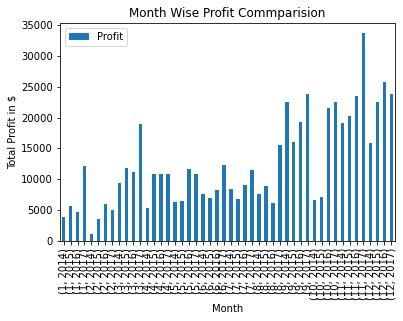

In [19]:
'''
MONTHWISE YEARWISE PROFIT COMARISION BAR CHART FOR 4 YRS 
columns in excel-
Days to Ship Actual,Sales Forecast,Ship Status,Days to Ship Scheduled,Sales per Customer,Profit Ratio,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Product Name,Profit,Quantity,Region,Profit per Order,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
'''
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

file='Superstore.xlsx'
df=pd.read_excel(file,usecols=['Order Date','Profit'])
#print(df)

#using regex to remove "$()," etc.
df['Profit']=df['Profit'].replace('[$,()]','',regex=True).astype(float)

pdata=df.groupby([df['Order Date'].dt.month,df['Order Date'].dt.year])[['Profit']].agg(np.sum)

print(pdata)


pdata.plot.bar(label='Monthly Profit for 4yrs')
plt.title('Month Wise Profit Commparision')
plt.xlabel('Month')
plt.ylabel('Total Profit in $')
plt.legend()
plt.show()